# Red Black Trees

**`Binary Search Trees`** have a problem. While it is true that on average *lookups, deletions and insertions* on BST are **`O(log(n)`**, that benefit can be broke quickly. 

If the sorted data is inserted into a binary tree, the tree will be much deeper than it is wide, which would bring the Big O complexity closer to **`O(n)`** since it would be a linked list

**Unbalanced tree**
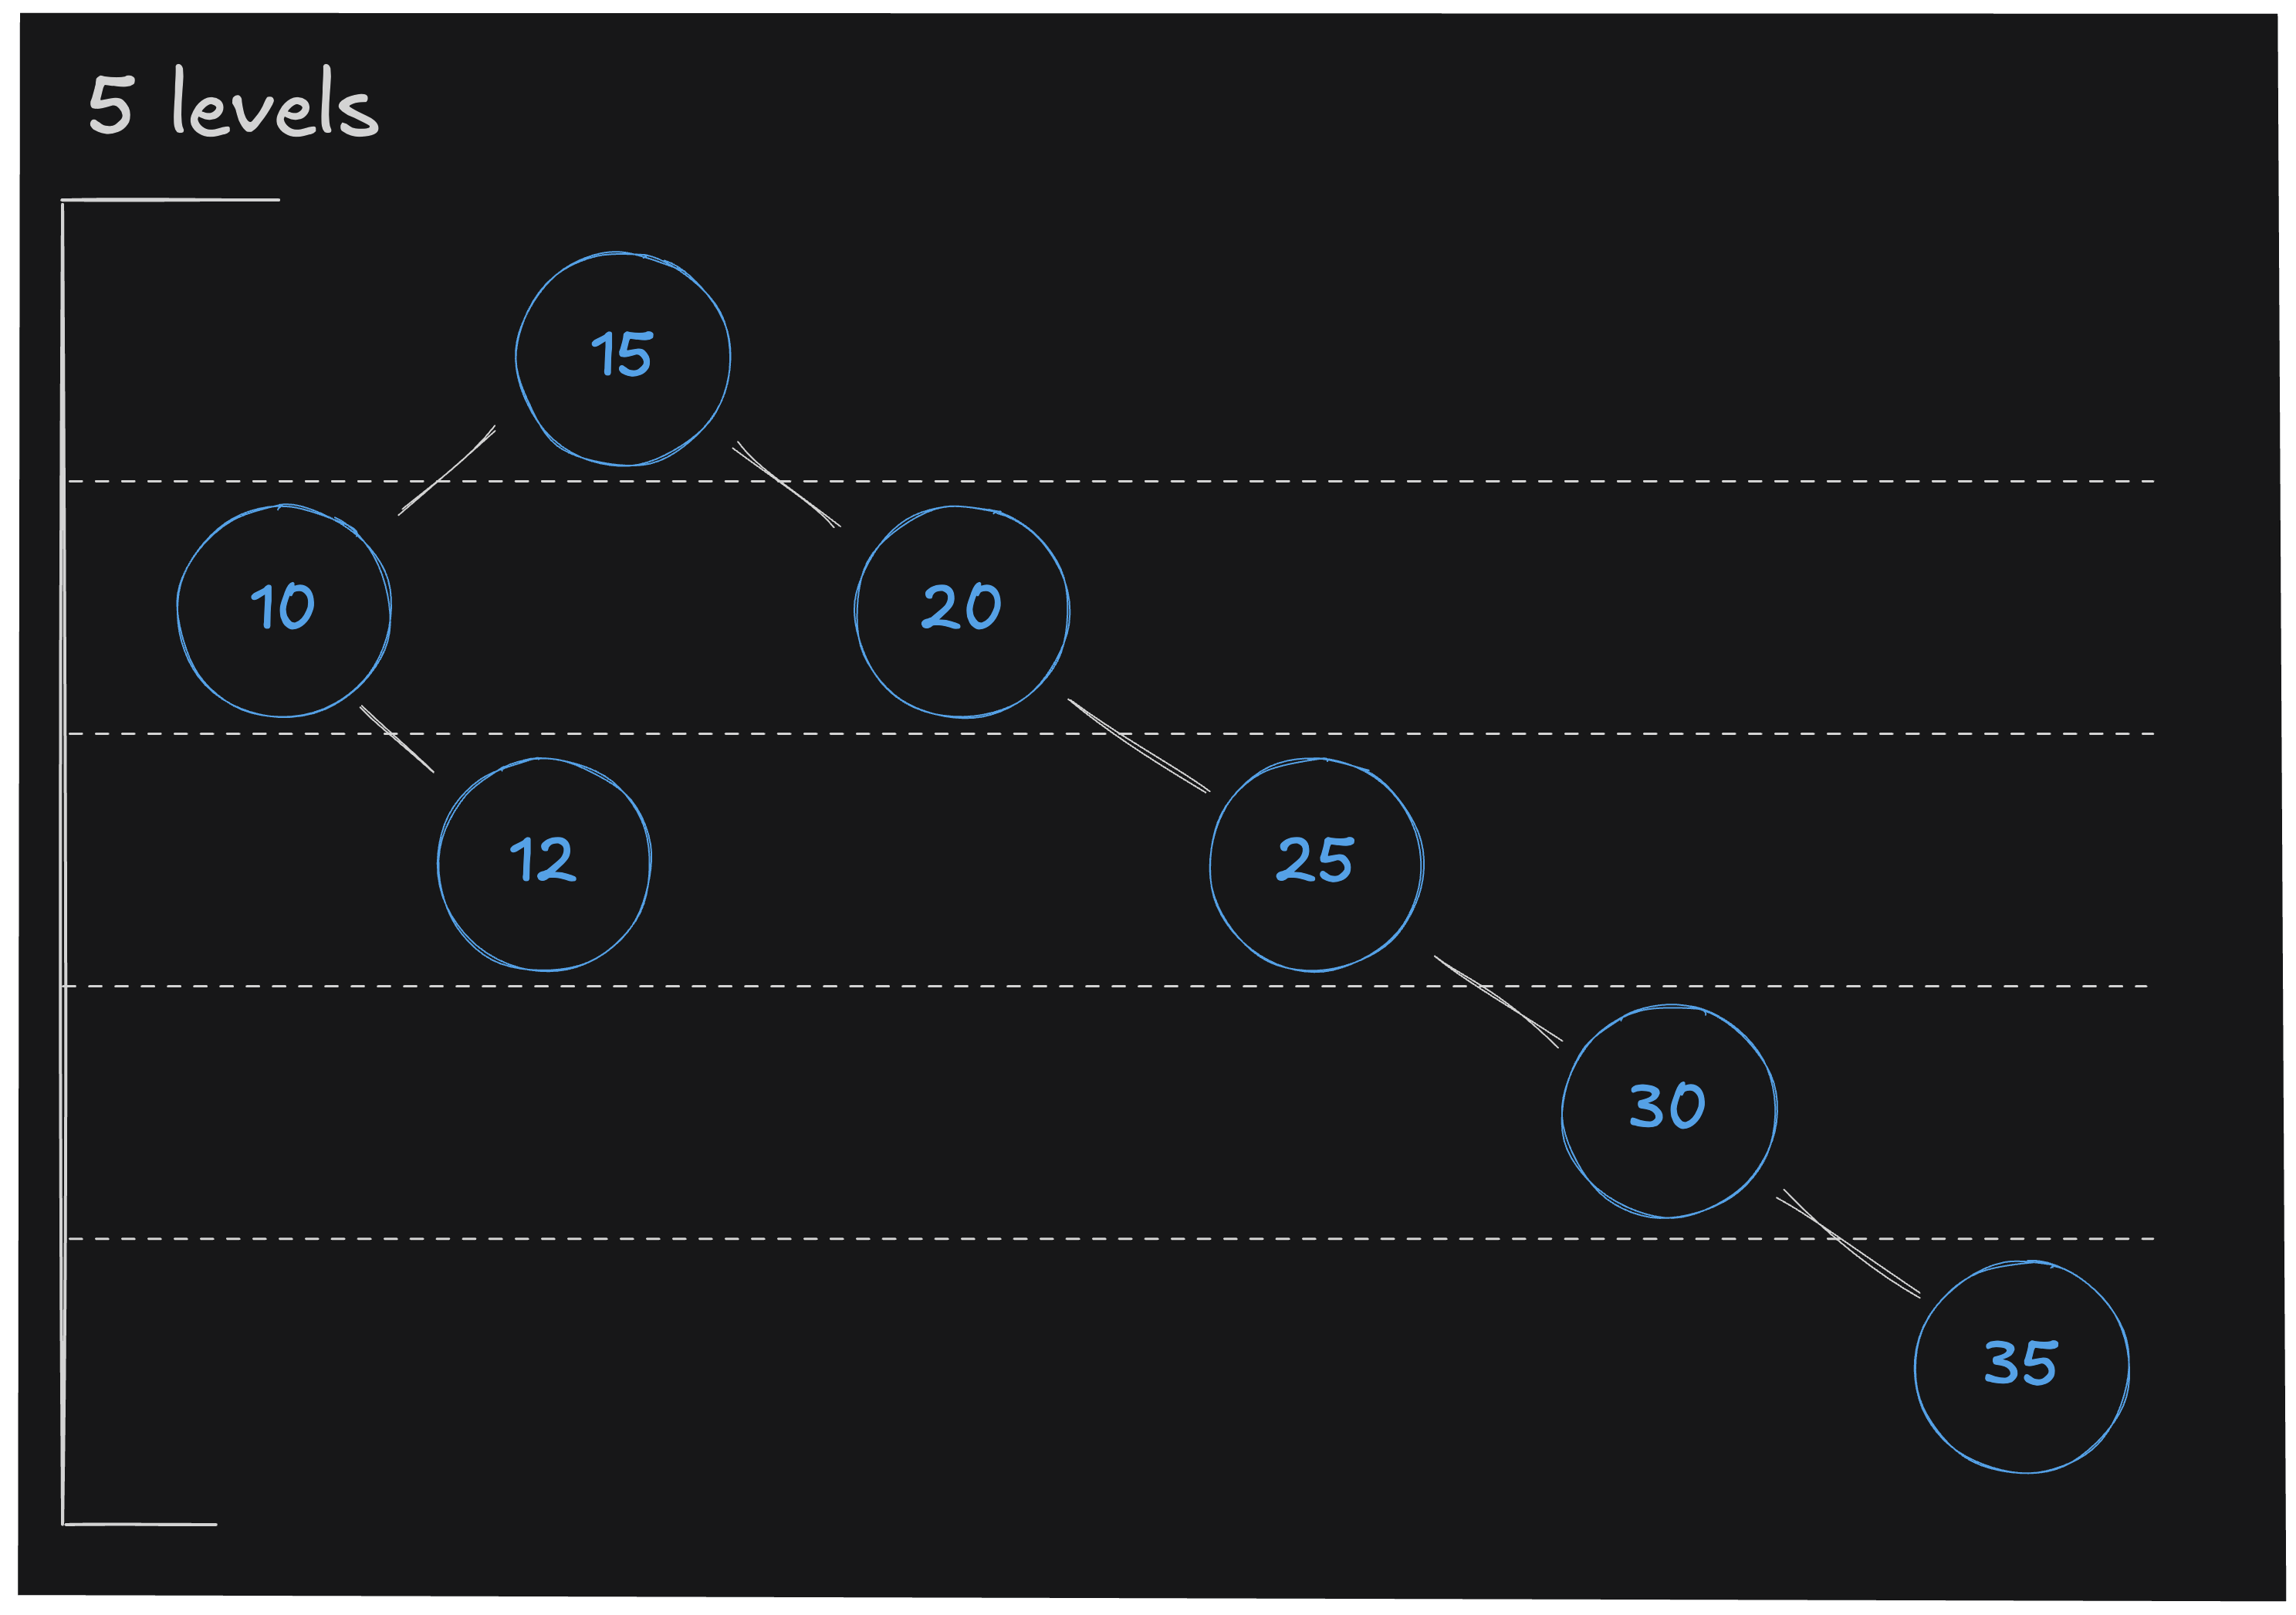

**Balanced tree**
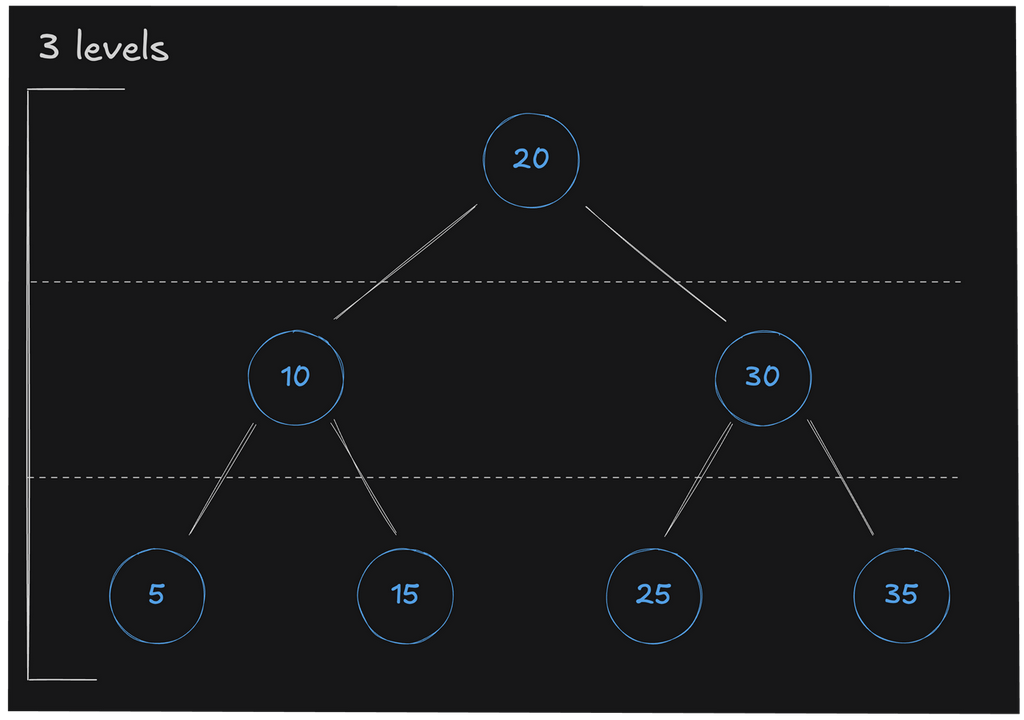

To solve this problem, red-black trees' blocks have an extra bit, called color, to ensure that as nodes are inserted and deleted, the tree remains balanced.  When the tree is modified, the tree is rearranged and repainted to restore some properties that ensure the tree to be balanced. 

___

## **The rules**:

1. Each node is either **red or black**
2. The root is **black**. This rule is sometimes ommited
3. All **`Nil`** leaf nodes are black
4. If a node is **red**, then both its children are **black**
5. All paths from a single node go through the same number of black nodes to reach any of its descendant **Nil** (black) nodes to ensure the balance of the tree

___

## Simple RBT

The following example implements a RBT. The code is not complete, because this only adds:

* A parent pointer from child parent, and the place of the child respect to its parent
* Mechanism to color nodes (only red for now)


In [1]:
#user class
import random


class User:
    def __init__(self, id):
        self.id = id
        user_names = [
            "Blake",
            "Ricky",
            "Shelley",
            "Dave",
            "George",
            "John",
            "James",
            "Mitch",
            "Williamson",
            "Burry",
            "Vennett",
            "Shipley",
            "Geller",
            "Rickert",
            "Carrell",
            "Baum",
            "Brownfield",
            "Lippmann",
            "Moses",
        ]
        self.user_name = f"{user_names[id % len(user_names)]}#{id}"

    def __eq__(self, other):
        return isinstance(other, User) and self.id == other.id

    def __lt__(self, other):
        return isinstance(other, User) and self.id < other.id

    def __gt__(self, other):
        return isinstance(other, User) and self.id > other.id

    def __repr__(self):
        return "".join(self.user_name)


def get_users(num):
    random.seed(1)
    users = []
    ids = []
    for i in range(num * 3):
        ids.append(i)
    random.shuffle(ids)
    ids = ids[:num]
    for id in ids:
        user = User(id)
        users.append(user)
    return users

In [1]:
class RBNode:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None


class RBTree:
    def __init__(self):
        self.nil = RBNode(None)
        self.nil.red = False
        self.nil.left = None
        self.nil.right = None
        self.root = self.nil

    def insert(self, val):
        new_node = RBNode(val)
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.red = True

        parent = None
        current_node = self.root

        while current_node != self.nil:
            #the current_node explores the tree to see the current value, and the node 
            #is stored in the parent var to have a reference when the loop reaches the 
            #bottom of the tree, and the children of the current node are self.nil
            parent = current_node
            if new_node.val < current_node.val:
                current_node = current_node.left
            elif new_node.val > current_node.val:
                current_node = current_node.right
            elif new_node.val == current_node.val:
                return
        #The child identifies the parent
        new_node.parent = parent
        if new_node.parent is None:
            self.root = new_node
        #The son positions himself in relation to his father
        elif new_node.val > new_node.parent.val:
            new_node.parent.right = new_node
        elif new_node.val < new_node.parent.val:
            new_node.parent.left = new_node

___
The rebalancing of a RBT does not result in a perfectly balanced tree. It only limits how unbalanced a tree may become. However, the operations on a RBT are always performed in **O(log(n))** time.
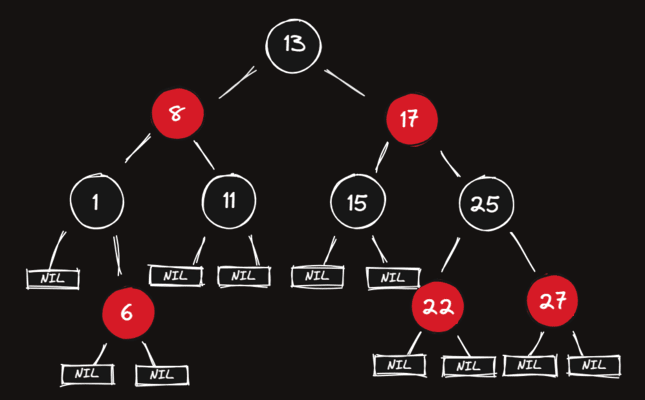
___

# Rotate method

Rotations are what actually keep a RBT balanced. Every time one branch of the tree starts to get too long, we can rotate those branches to keep the tree shallow

Rotations are O(1) operations

Example of rotation:
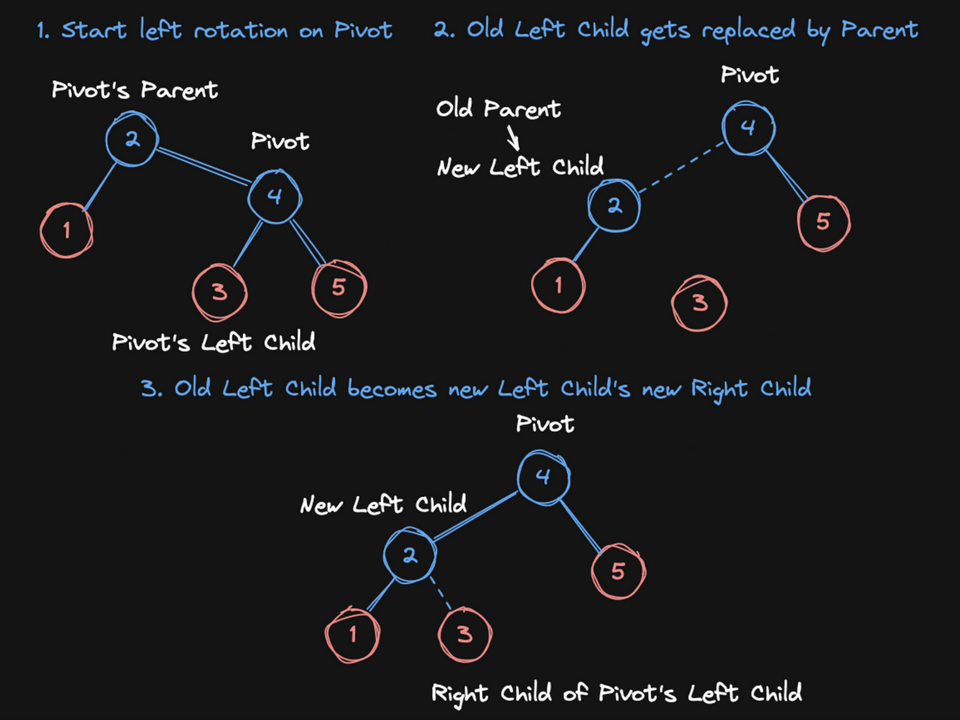

In [ ]:
    def rotate_left(self, pivot_parent):
        if pivot_parent == self.nil or pivot_parent.right == self.nil:
            return 
        pivot = pivot_parent.right
        pivot_parent.right = pivot.left
        if pivot.left != self.nil:
            pivot.left.parent = pivot_parent
        pivot.parent = pivot_parent.parent
        if pivot_parent == self.root:
            self.root = pivot
        elif pivot_parent == pivot_parent.parent.left:
            pivot_parent.parent.left = pivot
        elif pivot_parent == pivot_parent.parent.right:
            pivot_parent.parent.right = pivot
        pivot.left = pivot_parent
        pivot_parent.parent = pivot
    
    # The same that rotate left, but with  all the directionality inverted
    def rotate_right(self, pivot_parent):
        if pivot_parent == self.nil or pivot_parent.left == self.nil:
            return
        pivot = pivot_parent.left
        pivot_parent.left = pivot.right
        if pivot.right != self.nil:
            pivot.right.parent = pivot_parent
        pivot.parent = pivot_parent.parent
        if pivot_parent == self.root:
            self.root = pivot
        elif pivot_parent == pivot_parent.parent.right:
            pivot_parent.parent.right = pivot
        elif pivot_parent == pivot_parent.parent.left:
            pivot_parent.parent.left = pivot
        pivot.right = pivot_parent
        pivot_parent.parent = pivot

# Final code

In [7]:
class RBNode:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None


class RBTree:
    def __init__(self):
        self.nil = RBNode(None)
        self.nil.red = False
        self.nil.left = None
        self.nil.right = None
        self.root = self.nil

    def insert(self, val):
        new_node = RBNode(val)
        new_node.parent = None
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.red = True
        parent = None
        current = self.root
        while current != self.nil:
            parent = current
            if new_node.val < current.val:
                current = current.left
            elif new_node.val > current.val:
                current = current.right
            else:
                # duplicate, just ignore
                return

        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.val < parent.val:
            parent.left = new_node
        else:
            parent.right = new_node
        self.fix_insert(new_node)


    def fix_insert(self, new_node):
        current_node = new_node
        while current_node != self.root and current_node.parent.red is True:
            parent = current_node.parent
            grandparent = parent.parent

            if parent == grandparent.right:
                uncle = grandparent.left
                if uncle.red is True:
                    uncle.red = False
                    parent.red = False
                    grandparent.red = True
                    current_node = grandparent

                elif uncle.red is False:
                    if current_node == parent.left:
                        current_node = parent
                        self.rotate_right(current_node)
                        parent = current_node.parent
                    parent.red = False
                    grandparent.red = True
                    self.rotate_left(grandparent)
                
            elif parent == grandparent.left:
                uncle = grandparent.right

                if uncle.red is True:
                    uncle.red = False
                    parent.red = False
                    grandparent.red = True
                    current_node = grandparent

                elif uncle.red is False:
                    if current_node == parent.right:
                        current_node = parent
                        self.rotate_left(current_node)
                        parent = current_node.parent
                    parent.red = False
                    grandparent.red = True
                    self.rotate_right(grandparent)
        self.root.red = False


    def exists(self, val):
        curr = self.root
        while curr != self.nil and val != curr.val:
            if val < curr.val:
                curr = curr.left
            else:
                curr = curr.right
        return curr

    def rotate_left(self, pivot_parent):
        if pivot_parent == self.nil or pivot_parent.right == self.nil:
            return
        pivot = pivot_parent.right
        pivot_parent.right = pivot.left
        if pivot.left != self.nil:
            pivot.left.parent = pivot_parent

        pivot.parent = pivot_parent.parent
        if pivot_parent.parent is None:
            self.root = pivot
        elif pivot_parent == pivot_parent.parent.left:
            pivot_parent.parent.left = pivot
        else:
            pivot_parent.parent.right = pivot
        pivot.left = pivot_parent
        pivot_parent.parent = pivot

    def rotate_right(self, pivot_parent):
        if pivot_parent == self.nil or pivot_parent.left == self.nil:
            return
        pivot = pivot_parent.left
        pivot_parent.left = pivot.right
        if pivot.right != self.nil:
            pivot.right.parent = pivot_parent

        pivot.parent = pivot_parent.parent
        if pivot_parent.parent is None:
            self.root = pivot
        elif pivot_parent == pivot_parent.parent.right:
            pivot_parent.parent.right = pivot
        else:
            pivot_parent.parent.left = pivot
        pivot.right = pivot_parent
        pivot_parent.parent = pivot

In [13]:
import random

# ==========================================
# 1. CLASE USER (Datos)
# ==========================================
class User:
    def __init__(self, id):
        self.id = id
        user_names = [
            "Blake", "Ricky", "Shelley", "Dave", "George", "John", "James",
            "Mitch", "Williamson", "Burry", "Vennett", "Shipley", "Geller",
            "Rickert", "Carrell", "Baum", "Brownfield", "Lippmann", "Moses",
        ]
        self.user_name = f"{user_names[id % len(user_names)]}#{id}"

    def __eq__(self, other):
        return isinstance(other, User) and self.id == other.id

    def __lt__(self, other):
        return isinstance(other, User) and self.id < other.id

    def __gt__(self, other):
        return isinstance(other, User) and self.id > other.id

    def __repr__(self):
        return "".join(self.user_name)

def get_users(num):
    random.seed(1)
    users = []
    ids = []
    for i in range(num * 3):
        ids.append(i)
    random.shuffle(ids)
    ids = ids[:num]
    for id in ids:
        user = User(id)
        users.append(user)
    return users
def print_tree(tree):
    lines = []
    if tree.root == tree.nil:
        return "Empty Tree"
    format_tree_string(tree.root, tree.nil, lines)
    return "\n".join(lines)

def format_tree_string(node, nil, lines, level=0):
    if node != nil:
        format_tree_string(node.right, nil, lines, level + 1)
        lines.append(
            " " * 4 * level
            + "> "
            + str(node.val)
            + " "
            + ("[red]" if node.red else "[black]")
        )
        format_tree_string(node.left, nil, lines, level + 1)

# === VALIDADOR DE REGLAS ROJO-NEGRO ===
def validate_rbtree_properties(tree):
    # Propiedad 0: Nodo es nodo RB (implícito)
    # Propiedad 2: Raíz es negra
    if tree.root.red:
        return False, "ERROR: La raíz es ROJA"
    
    return verify_properties_recursive(tree.root, tree.nil)

def verify_properties_recursive(node, nil):
    # Base case: nil node is black, returns black-height 1 (or 0 depending on convention, let's say 1 for logic)
    if node == nil:
        return 1, None 

    # Propiedad 4: Si un nodo es rojo, sus hijos son negros (No doble rojo)
    if node.red:
        if (node.left != nil and node.left.red) or (node.right != nil and node.right.red):
            return 0, f"ERROR: Violación Rojo-Rojo en nodo {node.val}"

    # Check subtrees
    lh, l_err = verify_properties_recursive(node.left, nil)
    rh, r_err = verify_properties_recursive(node.right, nil)

    if l_err: return 0, l_err
    if r_err: return 0, r_err

    # Propiedad 5: Misma altura negra en ambos caminos
    if lh != rh:
        return 0, f"ERROR: Altura negra inconsistente en nodo {node.val} (Izq: {lh}, Der: {rh})"
    
    # Altura negra actual: +1 si este nodo es negro
    return lh + (0 if node.red else 1), None


# ==========================================
# 4. MAIN EJECUCIÓN (Modificado para Jupyter)
# ==========================================

run_cases = [ (5000) ] # Puedes cambiar a 4, 10, 20 para probar

def run_test_simulation():
    passed_count = 0
    failed_count = 0
    
    for num_users in run_cases:
        print(f"\nTesting with {num_users} users...")
        users = get_users(num_users)
        tree = RBTree()
        
        # Inserción
        for user in users:
            tree.insert(user)
            
        # Impresión visual
        print("=====================================")
        print("Árbol Resultante:")
        print("-------------------------------------")
        print(print_tree(tree))
        print("-------------------------------------\n")
        
        # Verificación Automática (Sustituye a la comparación con ref)
        black_height, error_msg = validate_rbtree_properties(tree)
        
        if error_msg:
            print(f"❌ FAIL: {error_msg}")
            failed_count += 1
        else:
            print(f"✅ PASS: Estructura válida. Altura negra: {black_height}")
            passed_count += 1

    print("\n================ RESUMEN ================")
    if failed_count == 0:
        print("============= TODAS LAS PRUEBAS PASARON ==============")
    else:
        print(f"============= {failed_count} PRUEBAS FALLARON ==============")

# Ejecutar
if __name__ == "__main__":
    run_test_simulation()


Testing with 5000 users...
Árbol Resultante:
-------------------------------------
                                            > John#14996 [red]
                                        > Dave#14994 [black]
                                            > Brownfield#14988 [red]
                                    > Carrell#14986 [black]
                                        > Geller#14984 [black]
                                > Vennett#14982 [black]
                                            > Burry#14981 [black]
                                        > Ricky#14973 [red]
                                                > Baum#14968 [red]
                                            > Geller#14965 [black]
                                    > Burry#14962 [black]
                                            > Williamson#14961 [black]
                                        > Mitch#14960 [red]
                                            > Lippmann#14951 [black]
                          